# Mushroom Classification Problem

This problem involves predicting whether a given mushroom is edible or poisonous based on its physical characteristics.

Atributte information:

- cap-shape: bell = b, conical = c, convex = x, flat = f, knobbed = k, sunken = s
- cap-surface: fibrous = f, glossy = y, scaly = k, smooth = s
- cap-color: brown = n, buff = e, cinnamon = c, gray = g, green = r, pink = p, purple = u, red = e, white = w, yellow = y
- bruises: bruises = t, no = n
- odor: almond = a, anise = l, creosote = c, fishy = y, foul = f, musty = m, none = n, pungent = p, spicy = s
- gill-attachment: attached = a, descending = d, free = f, notched = n
- gill-spacing: close = c, crowded = w
- gill-size: broad = b, narrow = n
- gill-color: black = k, brown = n, buff = b, chocolate = h, gray = g, green = r, orange = o, pink = p, purple = u, red = e, white = w, yellow = y
- stalk-shape: enlarging = e, tapering = t
- stalk-root: bulbous = b, club = c, cup = u, equal = e, rhizomorphs = z, rooted = r, missing = ?
- stalk-surface-above-ring: fibrous = f, scaly = y, silky = k, smooth = s
- stalk-surface-below-ring: fibrous = f, scaly = y, silky = k, smooth = s
- stalk-color-above-ring: brown = n, buff = b, cinnamon = c, gray = g, orange = o, pink = p, red = e, white = w, yellow = y
- stalk-color-below-ring: brown = n, buff = b, cinnamon = c, gray = g, orange = o, pink = p, red = e, white = w, yellow = y
- veil-type: partial = p, universal = u
- veil-color: brown = n, orange = o, white = w, yellow = y
- ring-number: none = n, one = o, two = t
- ring-type: cobwebby = c, evanescent = e, flaring = f, large = l, none = n, pendant = p, sheathing = s, zone = z
- spore-print-color: black = k, brown = n, buff = b, chocolate = h, green = r, orange = o, purple = u, red = e, white = w, yellow = y
- population: abundant = a, clustered = c, numerous = n, scattered = s, several = v, solitary = y
- habitat: grasses = g, leaves = l, meadows = m, paths = p, urban = u, waste = w, woods = d

In [2]:
import pandas as pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pandas.read_csv('data/mushrooms.csv')

print(f'Data set shape is: {df.shape}')

df.head()


Data set shape is: (8124, 23)


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [4]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


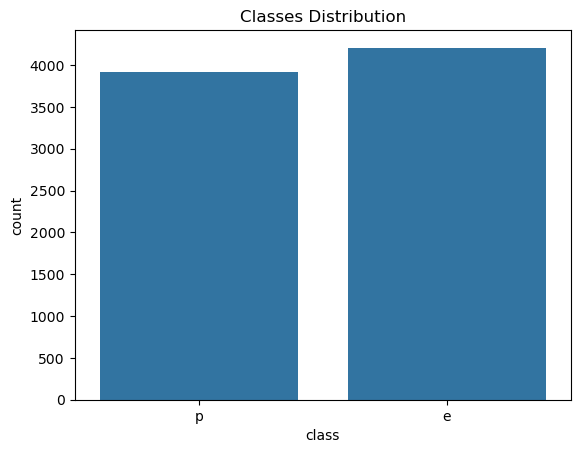

In [5]:
sns.countplot(x='class', data=df)
plt.title('Classes Distribution')
plt.show()

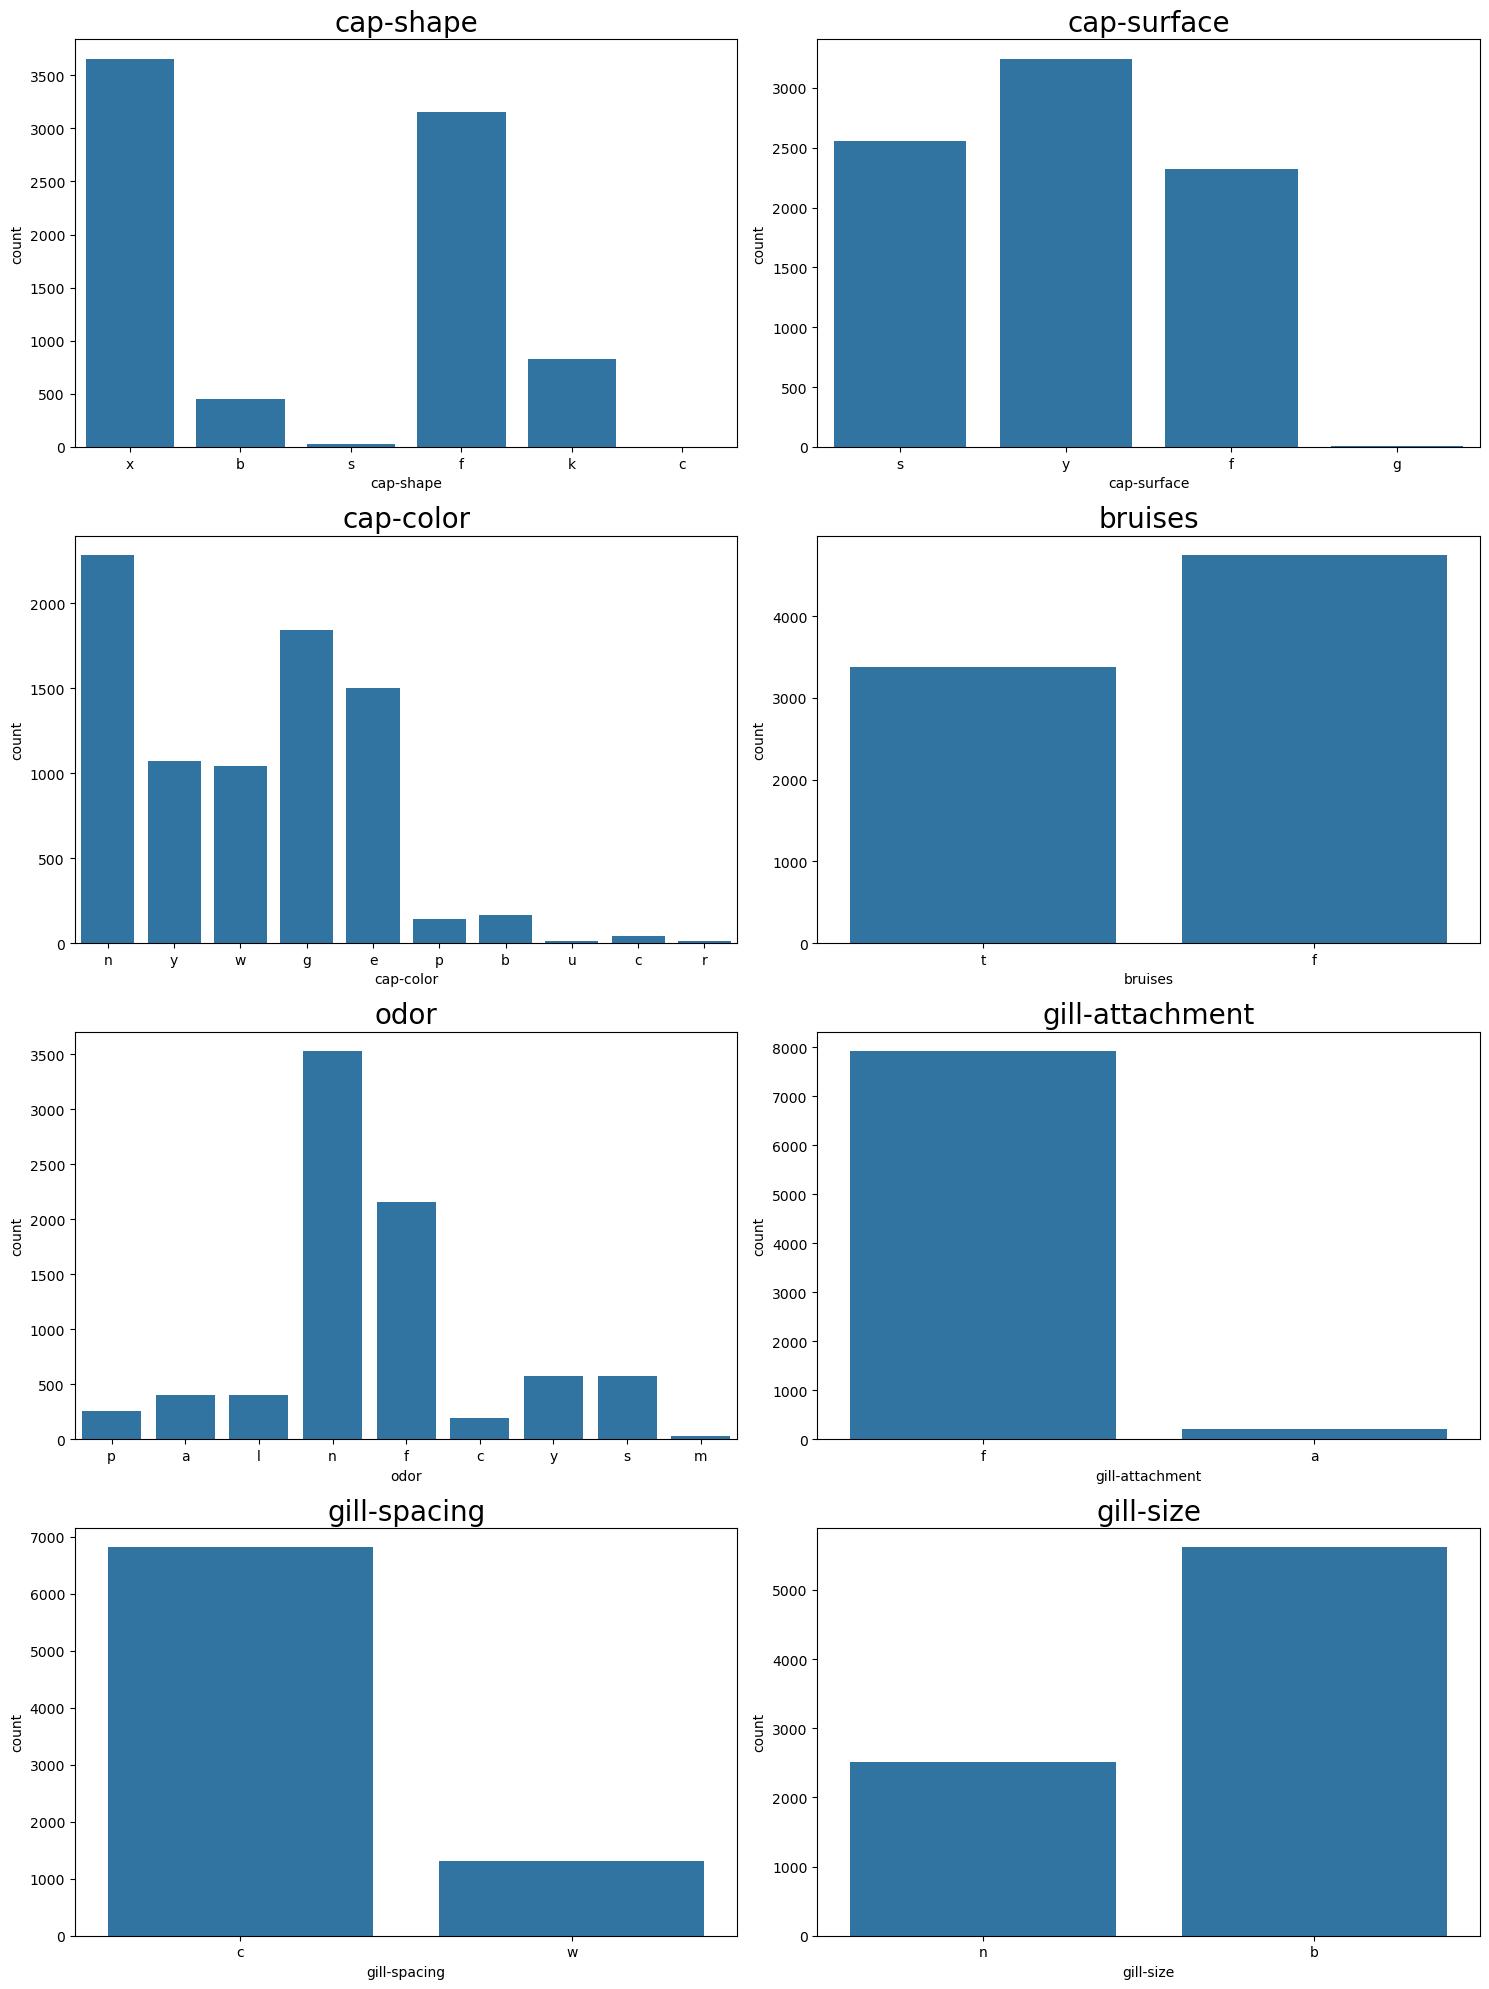

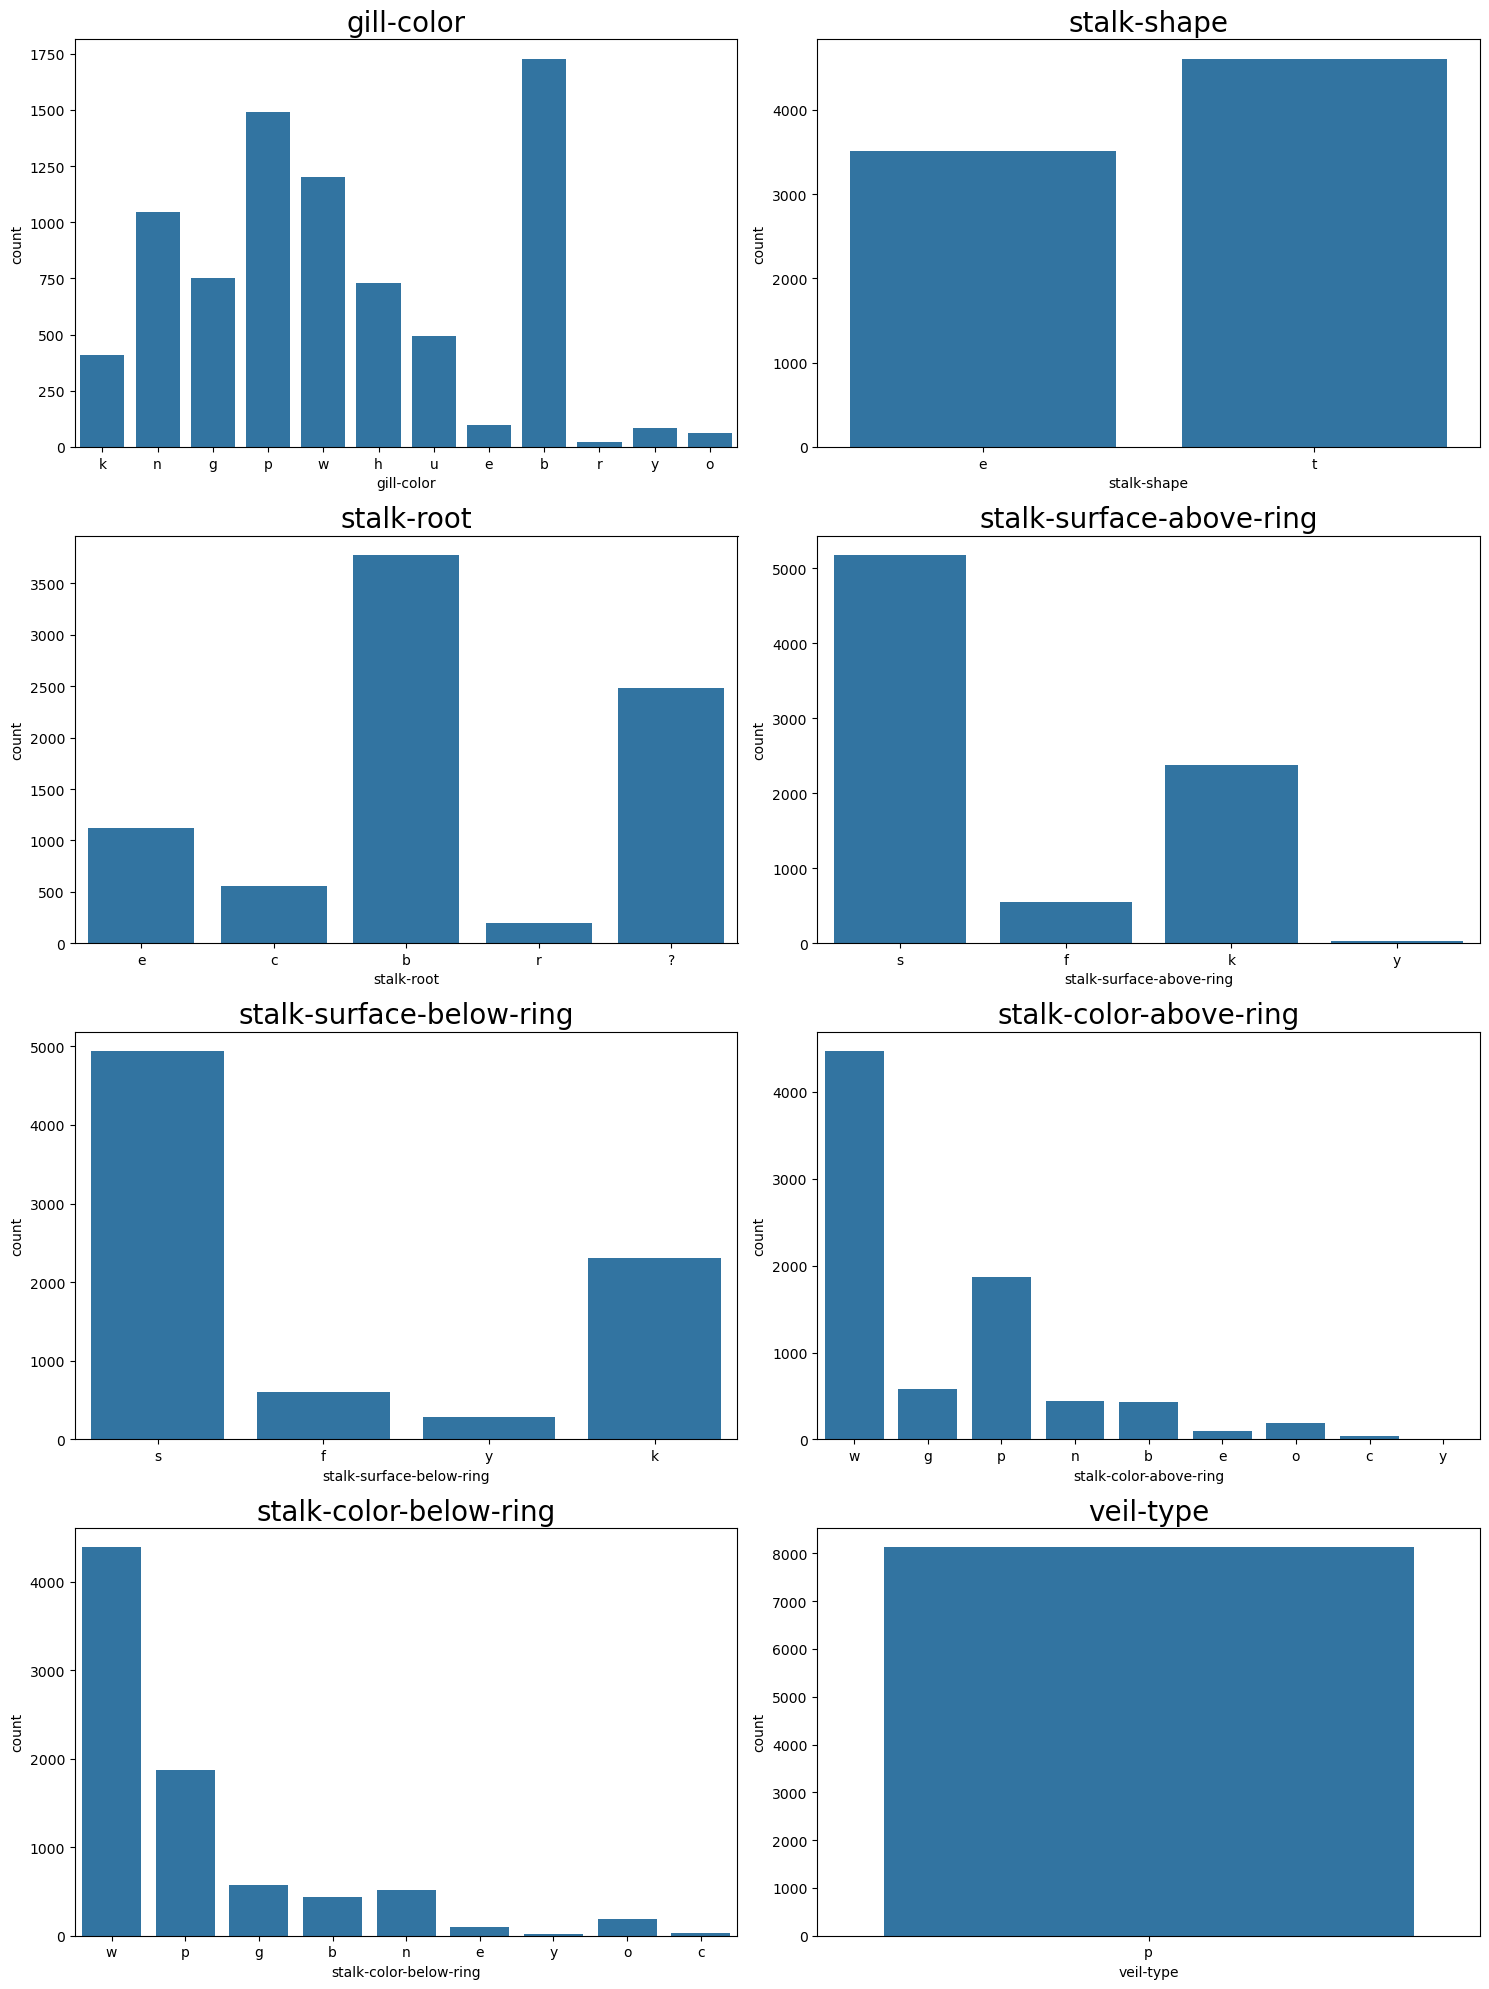

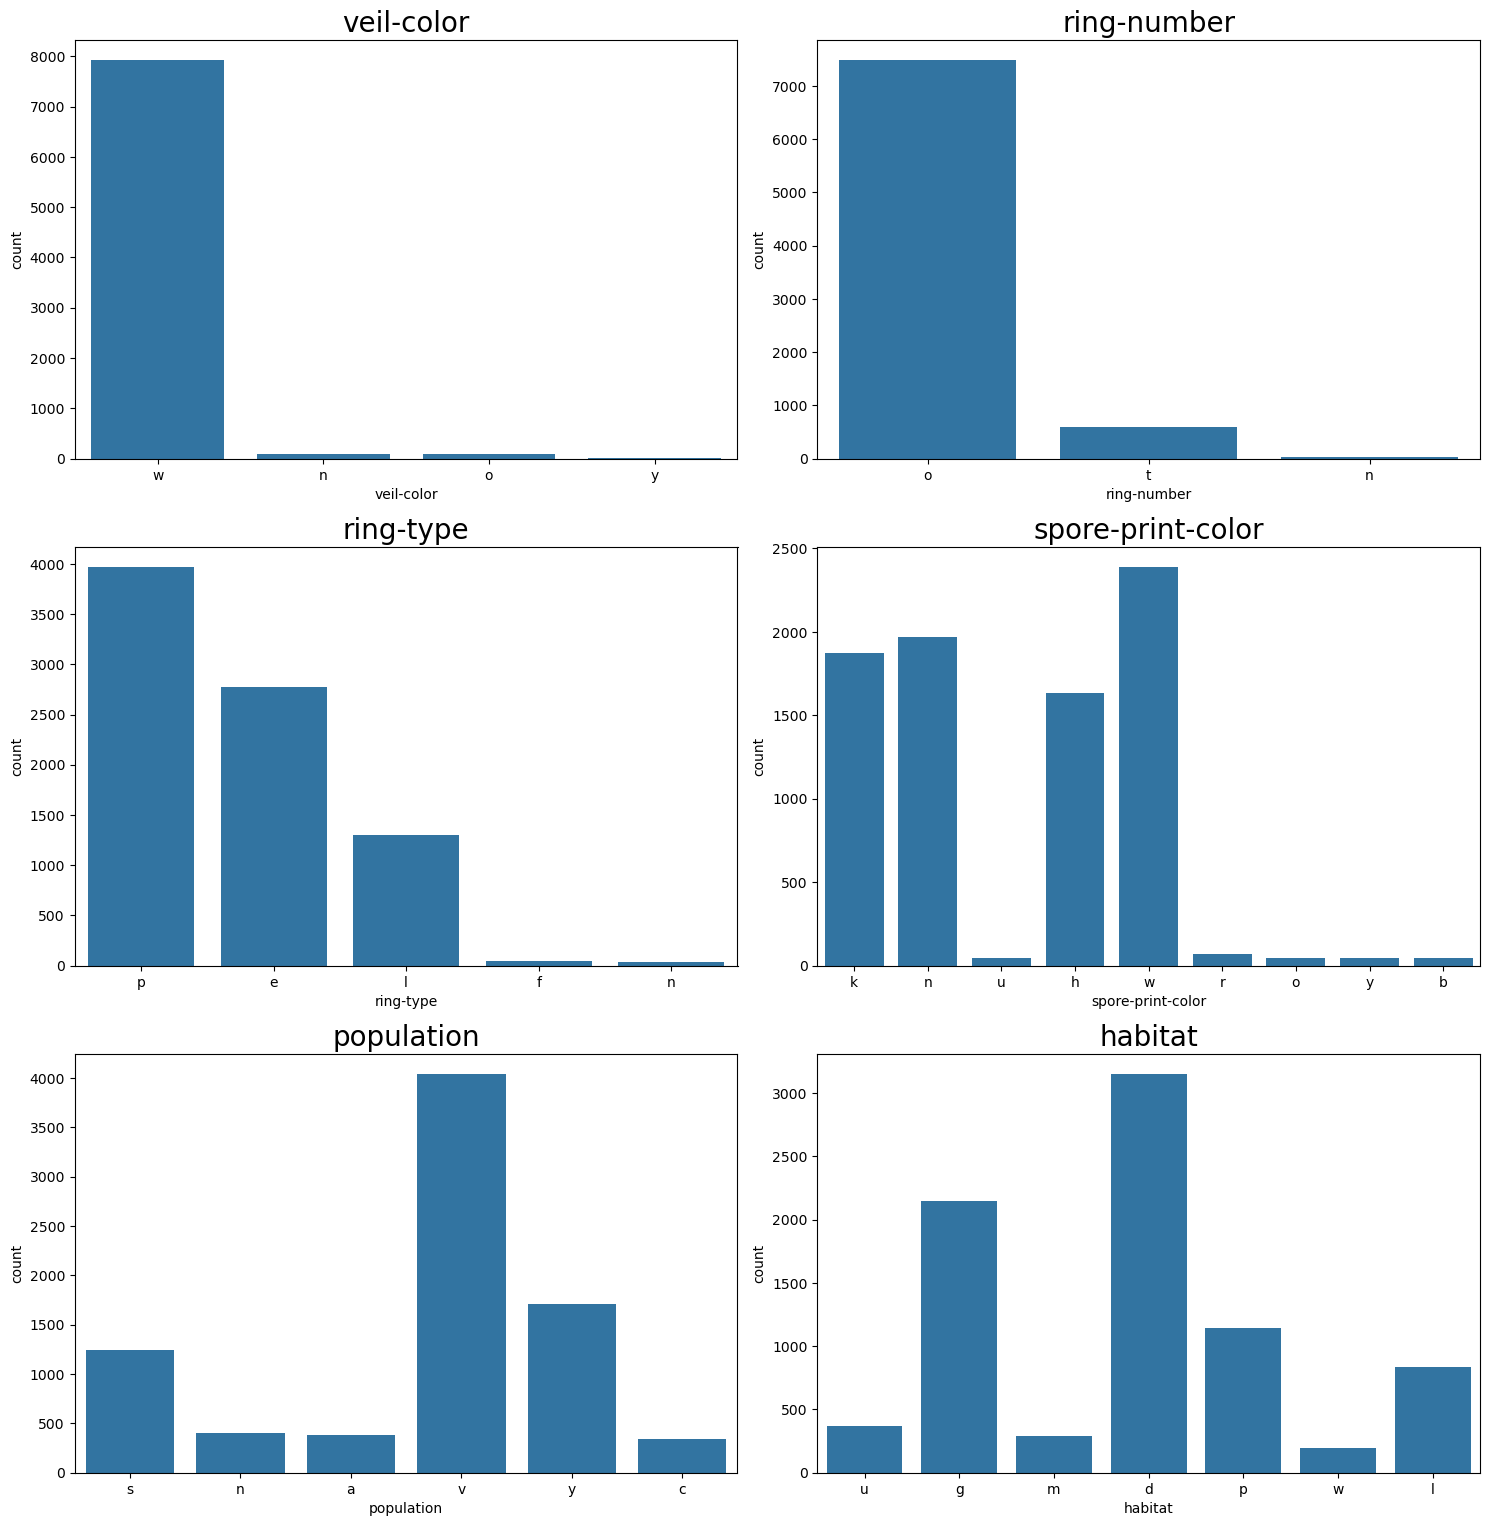

In [6]:
X = df.drop('class', axis=1)
y = df['class']

plt.figure(figsize=(15, 20))

m=1

for col in X.columns:
  plt.subplot(4,2,m)

  m+=1
  plt.title(col, fontsize=20)
  sns.countplot(x=col, data=df)

  if m > 8:
    plt.tight_layout()
    plt.show()
    plt.figure(figsize=(15, 20))
    m=1

plt.tight_layout()
plt.show()

Podemos observar que hay variables como veil-type o gill-attachment que solamente tienen un valor posible o de los varios valores posibles, uno de ellos es mucho más predominante. Esto lo tendremos en cuenta más tarde para la selección de características.

# Encoding

I am going to separate the variables into two types: those that are ordinal and those that are not. This way, we can use more appropriate encoding methods for each type of variable. In this case, for the non-ordinal variables I am going to apply Frequency Encoding instead of applying the typical OneHotEncoding, since many of the variables have a multitude of different values ​​and this would generate a dataset with too many columns. Having fewer columns speeds up the training process and can improve the interpretability of the results.

As for the Frequency Encoder, it is simply a matter of replacing the specific value of the variable with the percentage of times it appears in the data set.

BaseEstimator is used to simplify the creation of objects to be compatible with the Scikit-Learn API. 

TransformerMixin is used to create custom transformers. Automatically provides a fit_transform method, which combines the fit and transform steps. This is useful for transformers in pipelines.

In [53]:

from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.base import BaseEstimator, TransformerMixin

class FrequencyEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, columns=None):
        self.columns = columns 
        self.frequency_maps = {}
    
    def fit(self, X, y = None):
        if self.columns is None:
            self.columns = X.columns
        
        for col in self.columns:
            self.frequency_maps[col] = X[col].value_counts() / len(X)
        return self
    
    def transform(self, X):
        X = X.copy()
        for col in self.columns:
            X[col] = X[col].map(self.frequency_maps[col]).fillna(0)
        return X



ordinal_columns = ['ring-number']
ordinal_categories = [['n', 'o', 't']]

non_ordinal_columns = list(X.columns.drop(ordinal_columns))


# Feature Selection

To select the most relevant features I am going to use a technique based on information gain, or also known as mutual information.

Mutual information between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

This method attempts to estimate mutual information for a discrete target variable, in our case it's the 'case' variable, which can take values of 0 (poisonous) or 1 (edible) once it is encoded.

SelectKBest will be used to select the best features based on the result given by mutual_information_classification. SelectKBest also only opperates on training data, so we avoid data leaking.

In [21]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Models

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Pipeline


I will be automating all steps above into a Pipeline

In [75]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=27)


ordinal_preprocessor = OrdinalEncoder(categories= ordinal_categories)
non_ordinal_preprocessor = FrequencyEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('ordinal', ordinal_preprocessor, ordinal_columns),
        ('non_ordinal', non_ordinal_preprocessor, non_ordinal_columns)
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scale', StandardScaler()),
    ('feature_selection', SelectKBest(score_func=mutual_info_classif, k=15)),
    ('classifier', RandomForestClassifier(random_state=27))
])

I will be using GridSearchCV for hiperparameter tuning and cross-validation.

In [76]:
param_grid = {
    'feature_selection__k': [5, 10, 14, 17, 20, 22],
    'classifier__n_estimators': [25, 50, 100, 200],
}

grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('ordinal',
                                                                         OrdinalEncoder(categories=[['n',
                                                                                                     'o',
                                                                                                     't']]),
                                                                         ['ring-number']),
                                                                        ('non_ordinal',
                                                                         FrequencyEncoder(),
                                                                         ['cap-shape',
                                                                          'cap-surface',
                                                                          'cap-color',
                                                                          'bruises',
                                                                          'odor',
                                                                          'gill-attachment',
                                                                          'gill-spacing',
                                                                          'gill-size',
                                                                          'gill-color',
                                                                          'stalk-shape',
                                                                          'stalk-root',
                                                                          'stalk-surf...
                                                                          'population',
                                                                          'habitat'])])),
                                       ('scale', StandardScaler()),
                                       ('feature_selection',
                                        SelectKBest(k=15,
                                                    score_func=<function mutual_info_classif at 0x000001E0C9E4BA60>)),
                                       ('classifier',
                                        RandomForestClassifier(random_state=27))]),
             n_jobs=-1,
             param_grid={'classifier__n_estimators': [25, 50, 100, 200],
                         'feature_selection__k': [5, 10, 14, 17, 20, 22]},
             scoring='accuracy', verbose=2)

In [77]:
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'classifier__n_estimators': 25, 'feature_selection__k': 10}
Best score: 1.0


In [78]:
y_pred = grid_search.best_estimator_.predict(X_test)
print("Predictions in Test:", y_pred)

Predictions in Test: [1 0 0 ... 1 0 1]


In [79]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

1.0